## L curve w/ Spline Fitting 

In [18]:
import pandas as pd

df_header = pd.read_csv('noncv_result.dat')
print(df_header[" ltsv"].values)

lambda_arr =df_header[" ltsv"].values
chi_arr = np.log10( df_header[" chi"].values)##log chi
l1_term = np.log10( df_header[" l1_term"].values/df_header["l1"].values) ## log l1
ltsv_term =np.log10( df_header[" ltsv_term"].values/df_header[" ltsv"].values) ## log l1

from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

[1.000000e-05 1.778279e-05 3.162278e-05 5.623413e-05 1.000000e-04
 1.778279e-04 3.162278e-04 5.623413e-04 1.000000e-03 1.778279e-03
 3.162278e-03 5.623413e-03 1.000000e-02]


In [20]:
print (ltsv_term)

[ 0.75891068  0.57186446  0.37855455  0.21712847  0.05942519 -0.07492202
 -0.19427302 -0.31106181 -0.43769202 -0.5786033  -0.70330682 -0.85969898
 -0.95002998]


In [11]:
## Input of l1-term, lambda_arr, etc

In [53]:
## interplolation of results
spl_points = 1000
lambda_spl = 10**(np.linspace(-5, -2 , spl_points))
chi_spl =  UnivariateSpline(lambda_arr, chi_arr, k=3, s=0)
l1_spl = UnivariateSpline(lambda_arr, l1_term, k=3, s=0)
ltsv_spl = UnivariateSpline(lambda_arr, ltsv_term, k=3, s=0)

chi_spl_deri = chi_spl.derivative()
chi_spl_dderi = chi_spl.derivative().derivative()
l1_spl_deri = l1_spl.derivative()
l1_spl_dderi = l1_spl.derivative().derivative()
ltsv_spl_deri = ltsv_spl.derivative()
ltsv_spl_dderi = ltsv_spl.derivative().derivative()


In [54]:
## finding maxmimum curvature 
##https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf

def curvature_1d(rho_deri, eta_deri, rho_dderi, eta_dderi):
    dmy = (rho_deri * eta_dderi - rho_dderi * eta_deri)/(rho_deri**2 + eta_deri**2)**1.5
    flag = (dmy < 0)
    dmy[flag] = 0
    
    return dmy


curvature_now = curvature_1d(chi_spl_deri(lambda_spl), ltsv_spl_deri(lambda_spl), chi_spl_dderi(lambda_spl), ltsv_spl_dderi(lambda_spl))

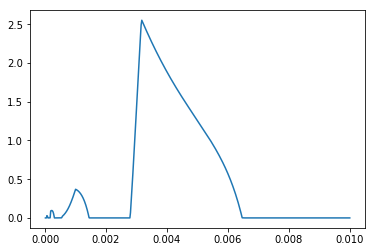

In [55]:
plt.plot(lambda_spl, curvature_now)

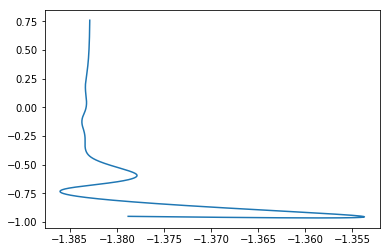

In [56]:
plt.plot(chi_spl(lambda_spl), ltsv_spl(lambda_spl))

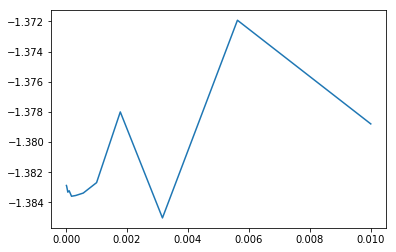

In [57]:
plt.plot(lambda_arr, chi_arr)

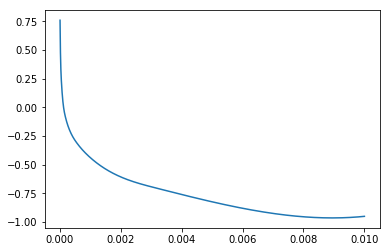

In [58]:
plt.plot(lambda_spl, ltsv_spl(lambda_spl))


In [11]:
x = np.linspace(0, 10, 70)
y = np.sin(x)
spl = UnivariateSpline(x, y, k=4, s=0)

In [12]:
spl_deri = spl.derivative()

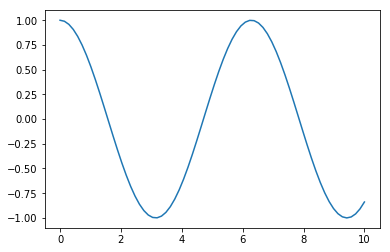

In [13]:
plt.plot(x, spl_deri(x))

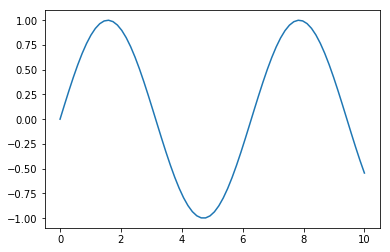

In [15]:
plt.plot(x, y)